# Wine dataset

### Добрый день!  Я совмещу презентацию с исследованием. Если данный материал будет читать менеджер, то он может пропускать код, но смотреть на графики и читать выводы, которые я буду отображать жизным шрифтом (как этот абзац).

Считаем данные и посмотрим на первые пять строк.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Посмотрим на распределения переменных. Для наглядности так же построим нормализованные box плоты.

In [2]:
df.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster",font_scale=.8)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[df.columns[:-1]]),
                      columns=df.columns[:-1])

//anaconda/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


//anaconda/envs/python2/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


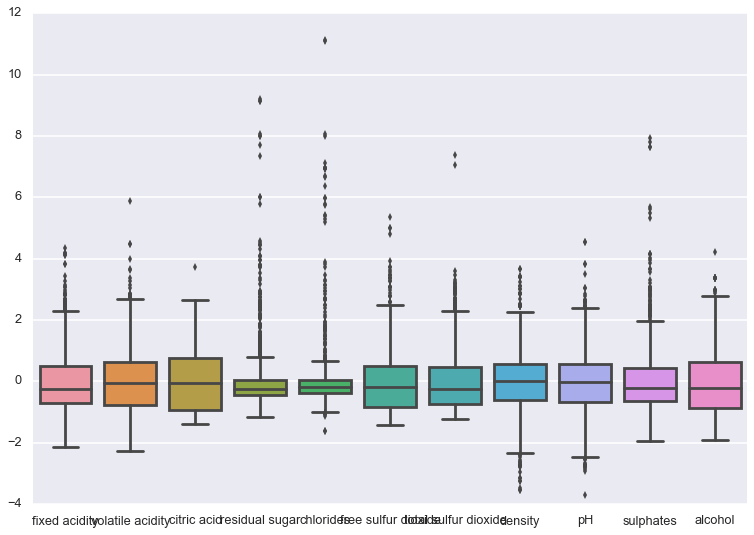

In [4]:
sns.boxplot(df_norm)

### Видно, что почти все переменные имеют симметричные распределения, значит линейные модели должны работать хорошо. Так же видно, что присутствуют какие-то outliers (причем большинство из них вылетает вправо от среднего). Можно будет попробовать определить их с помощью EllipticEnvelope или OneClassSVM и замегить например средними или вообще удалить.

Теперь взглянем на heat map и pair plot для всех переменных.

//anaconda/envs/python2/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/envs/python2/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


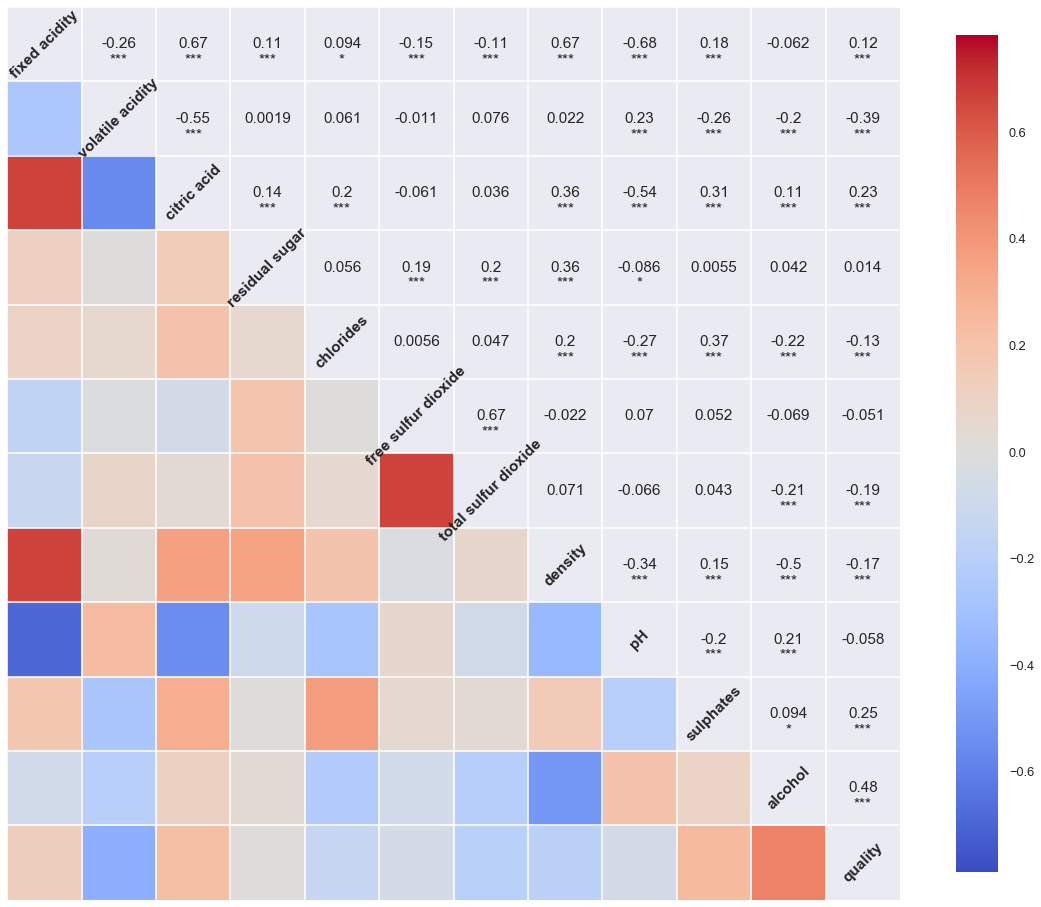

In [5]:
f, ax = plt.subplots(figsize=(20, 20))

sns.corrplot(df, ax=ax)

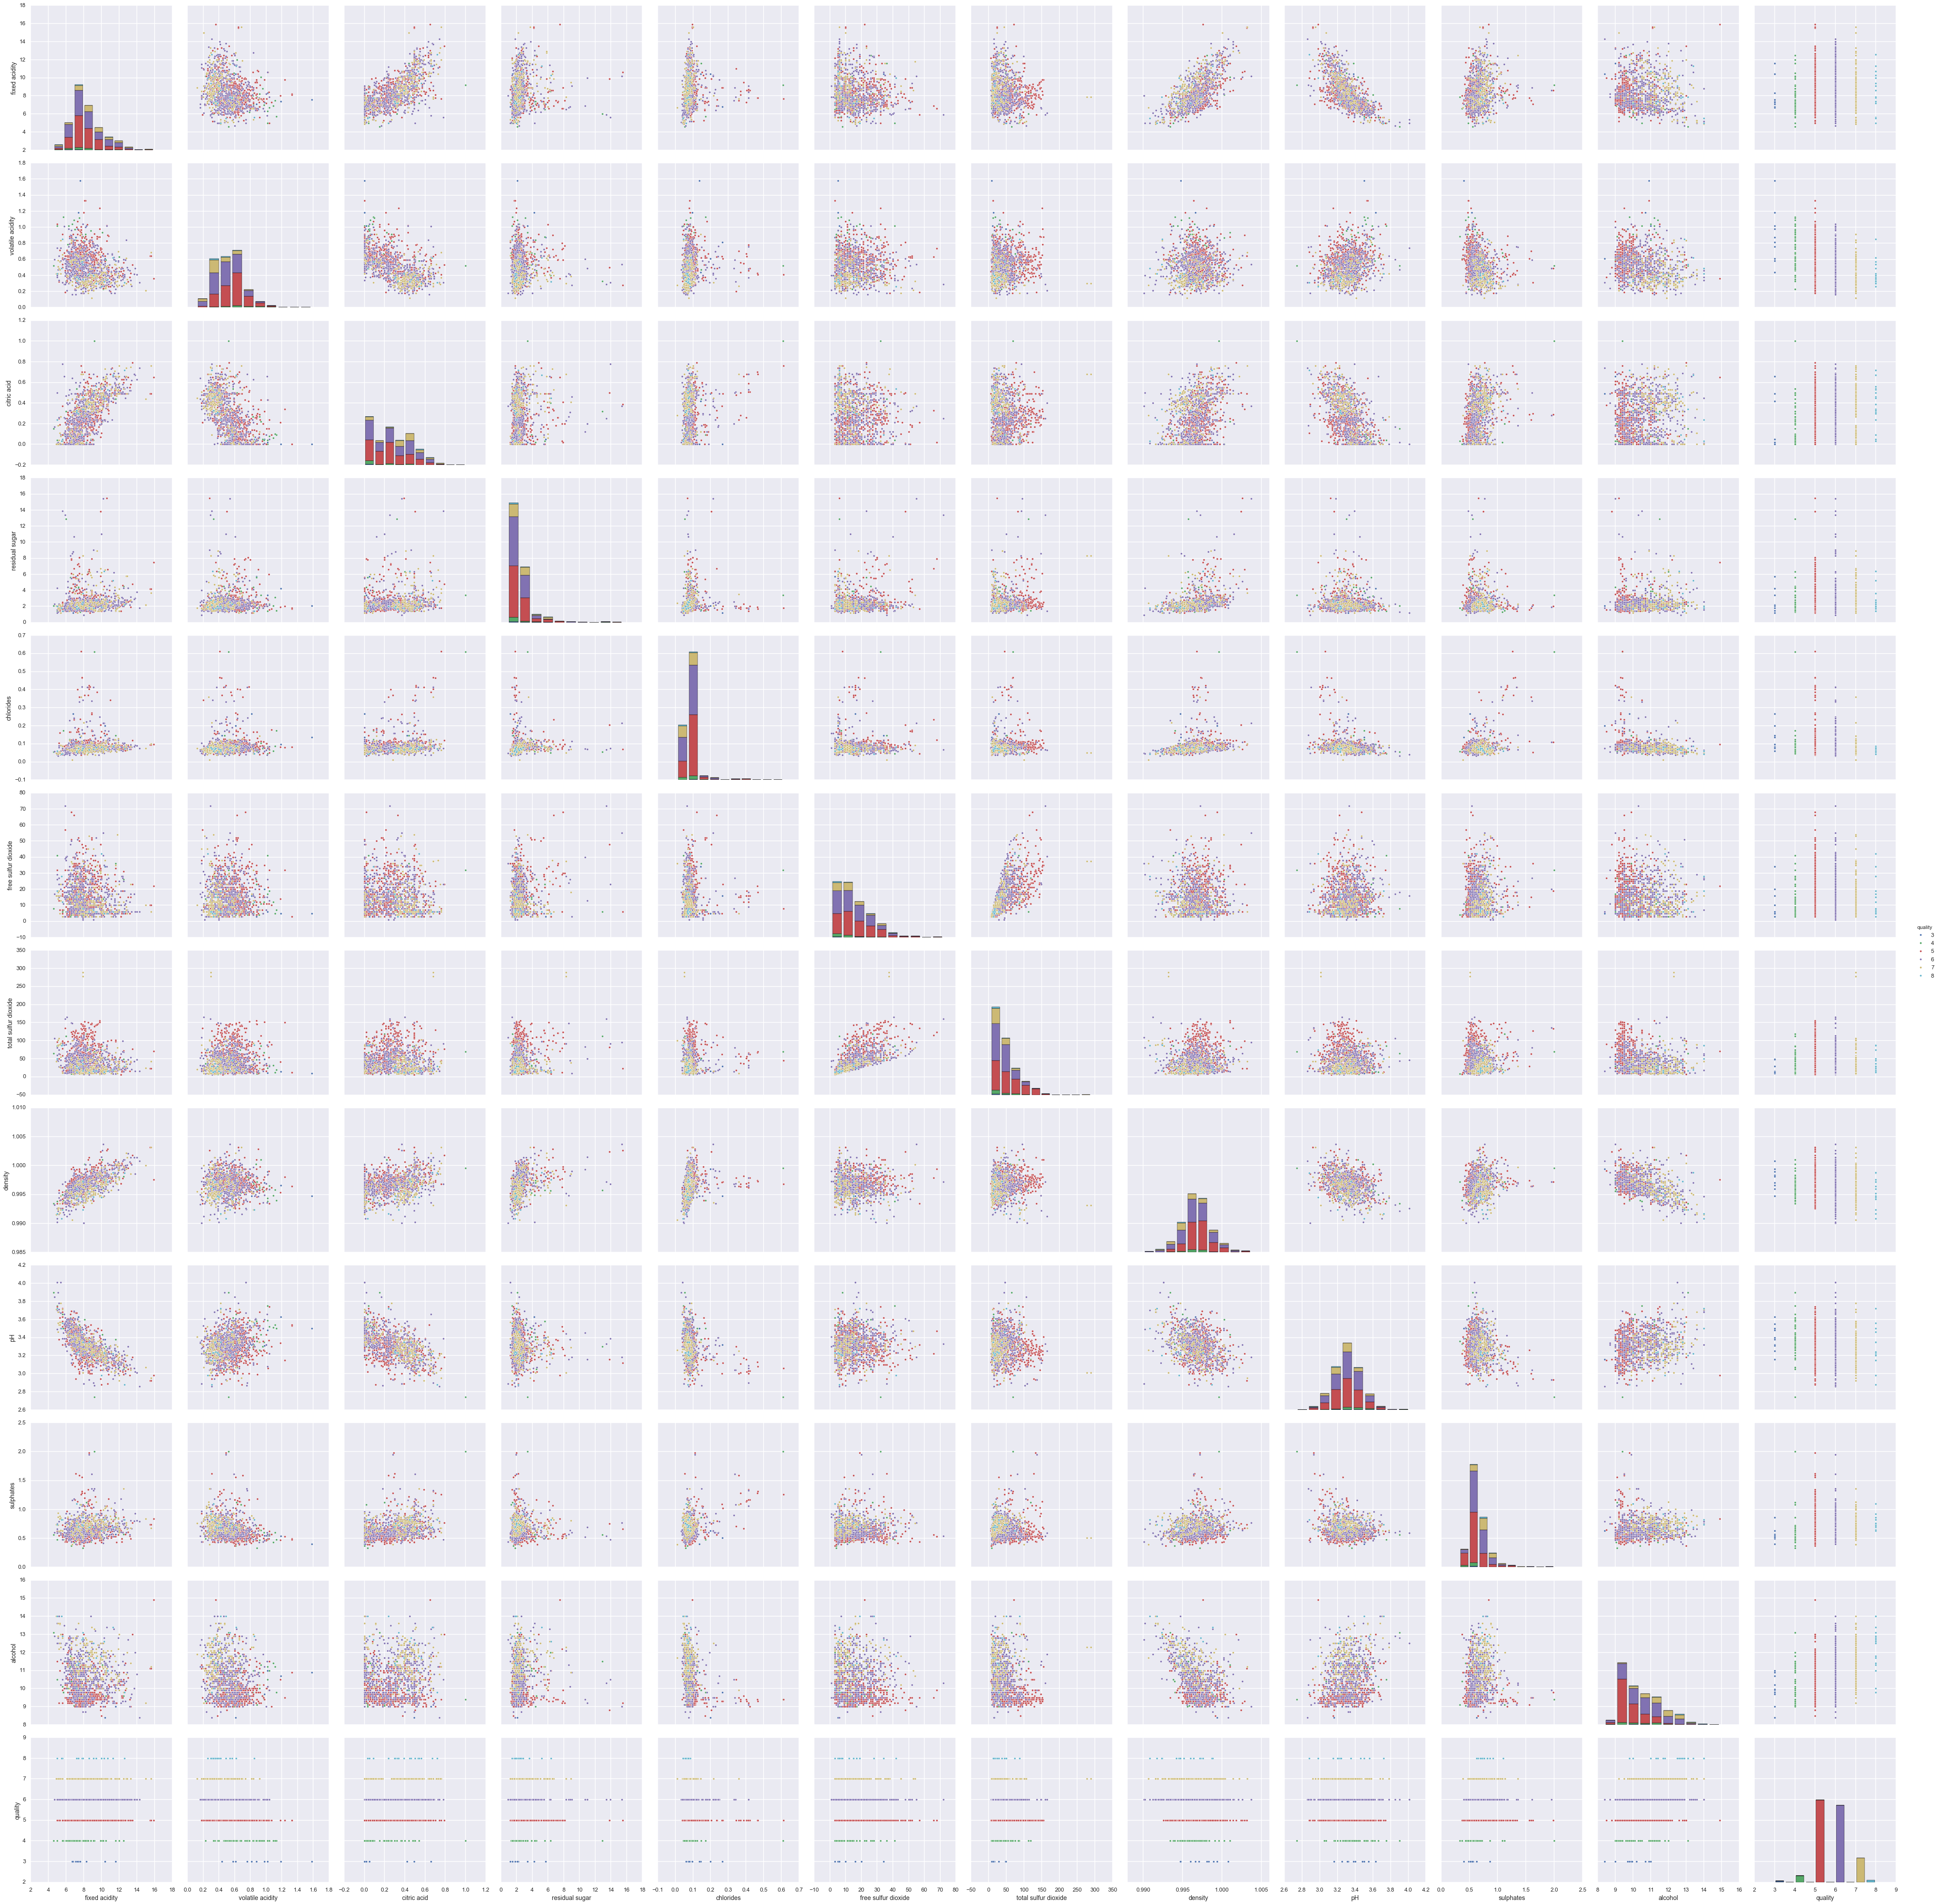

In [6]:
sns.pairplot(df,hue="quality",size=5)

Диаграммы получилось хорошего качестра, так что можно использовать зум в браузере, чтобы получше разглядеть ту или иную часть изображения. Построим еще балланс классов.

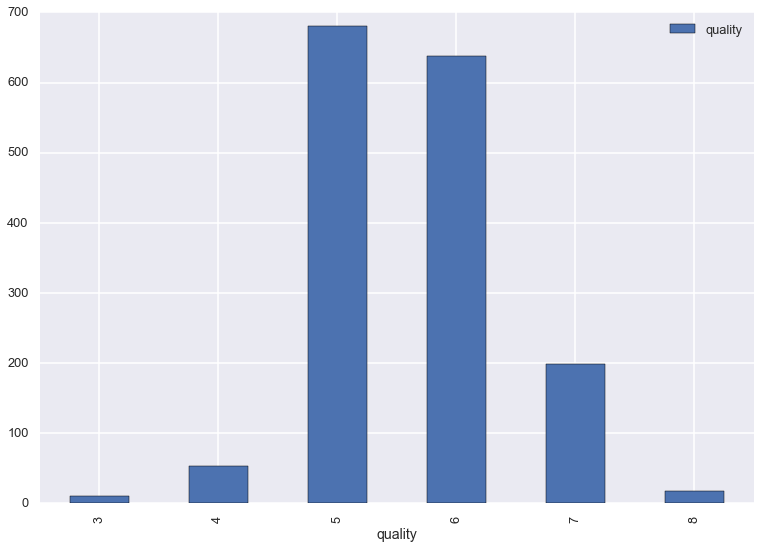

In [7]:
df.groupby('quality')['quality'].count().to_frame().plot(kind='bar')

### - Видно, что есть переменные, которые сильно коррелируют с другими например fixed acidity, density и ph. Это говорит нам о том, что при использовании линейных моделей нужно опасаться мультиколлениарности и использовать регуляризацию. 
### - Еще видно, что целевой переменой наиболее сильно коррелирует alcohol. Возможно, что чем больше у вина выдерка, тем больше в нем становиться алкоголя.
### - Классы очень не сбалансированы, поэтому нужно будет использовать стратификацию, либо досэмплировать маленькие классы.

### На этом закончим описывать сам дата-сет и перейдем к моделированию. К данным картинкам всегда можно будет вернуться, чтобы проверить какую-нибудь догадку.

# Кластерицазия.

Начнем с k-means

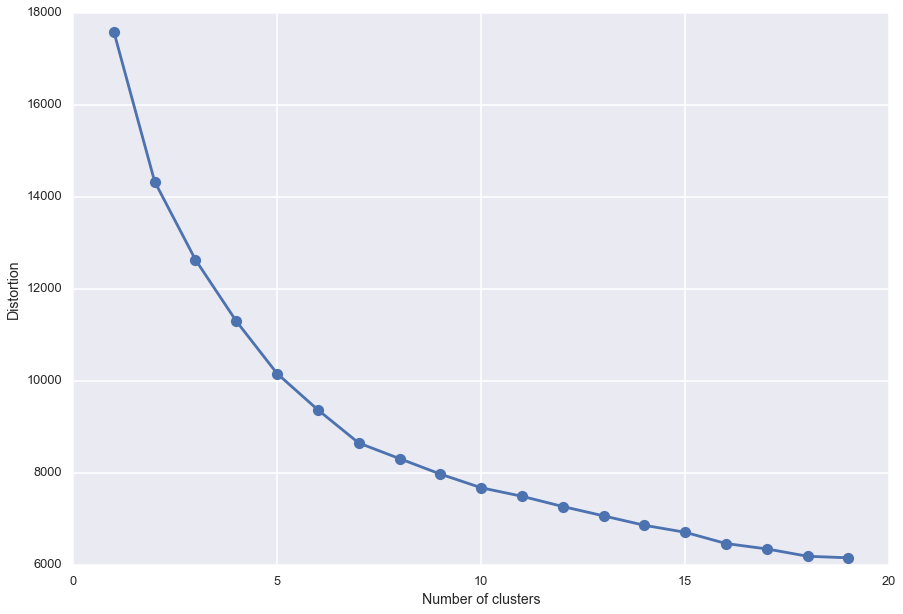

In [8]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_norm)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

### Использую метод "локтя" можно определить, оптимальное кол-во кластеров. По оси y отложена сумма расстояний от объекта до ближайшего центроида для всех объектов выборки. Мне кажется, что это расстояние перестаеют значительно уменьшаться после (грубо) 5 кластеров, и более точно после 9 кластеров.

Давайте посмотрим на показатели силуэтов. Можно строить графики, как [здесь](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), но я просто выведу средние силуэты.

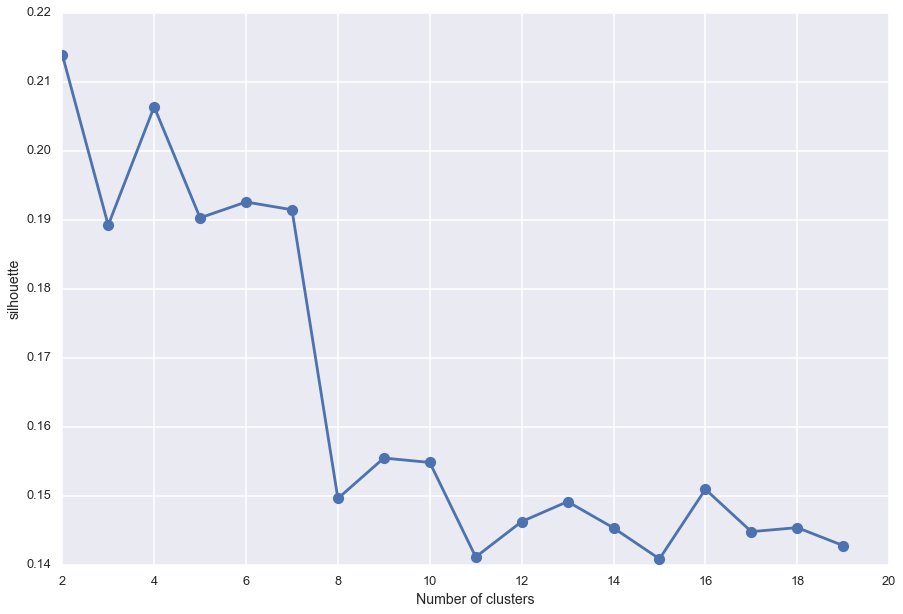

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    
    cluster_labels = km.fit_predict(df_norm)
    distortions.append(silhouette_score(df_norm, cluster_labels))
    
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette')
plt.tight_layout()
plt.show()

### Наибольший силуэт получился при n = 2. Но учитываю позатели предыдущего анализа целесообразнее использовать 4. Давайте визуализируем эти кластеры на pair plot.

In [10]:
km = KMeans(n_clusters=4, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    
cluster_labels = km.fit_predict(df_norm)

In [11]:
df_norm['clust4'] = cluster_labels

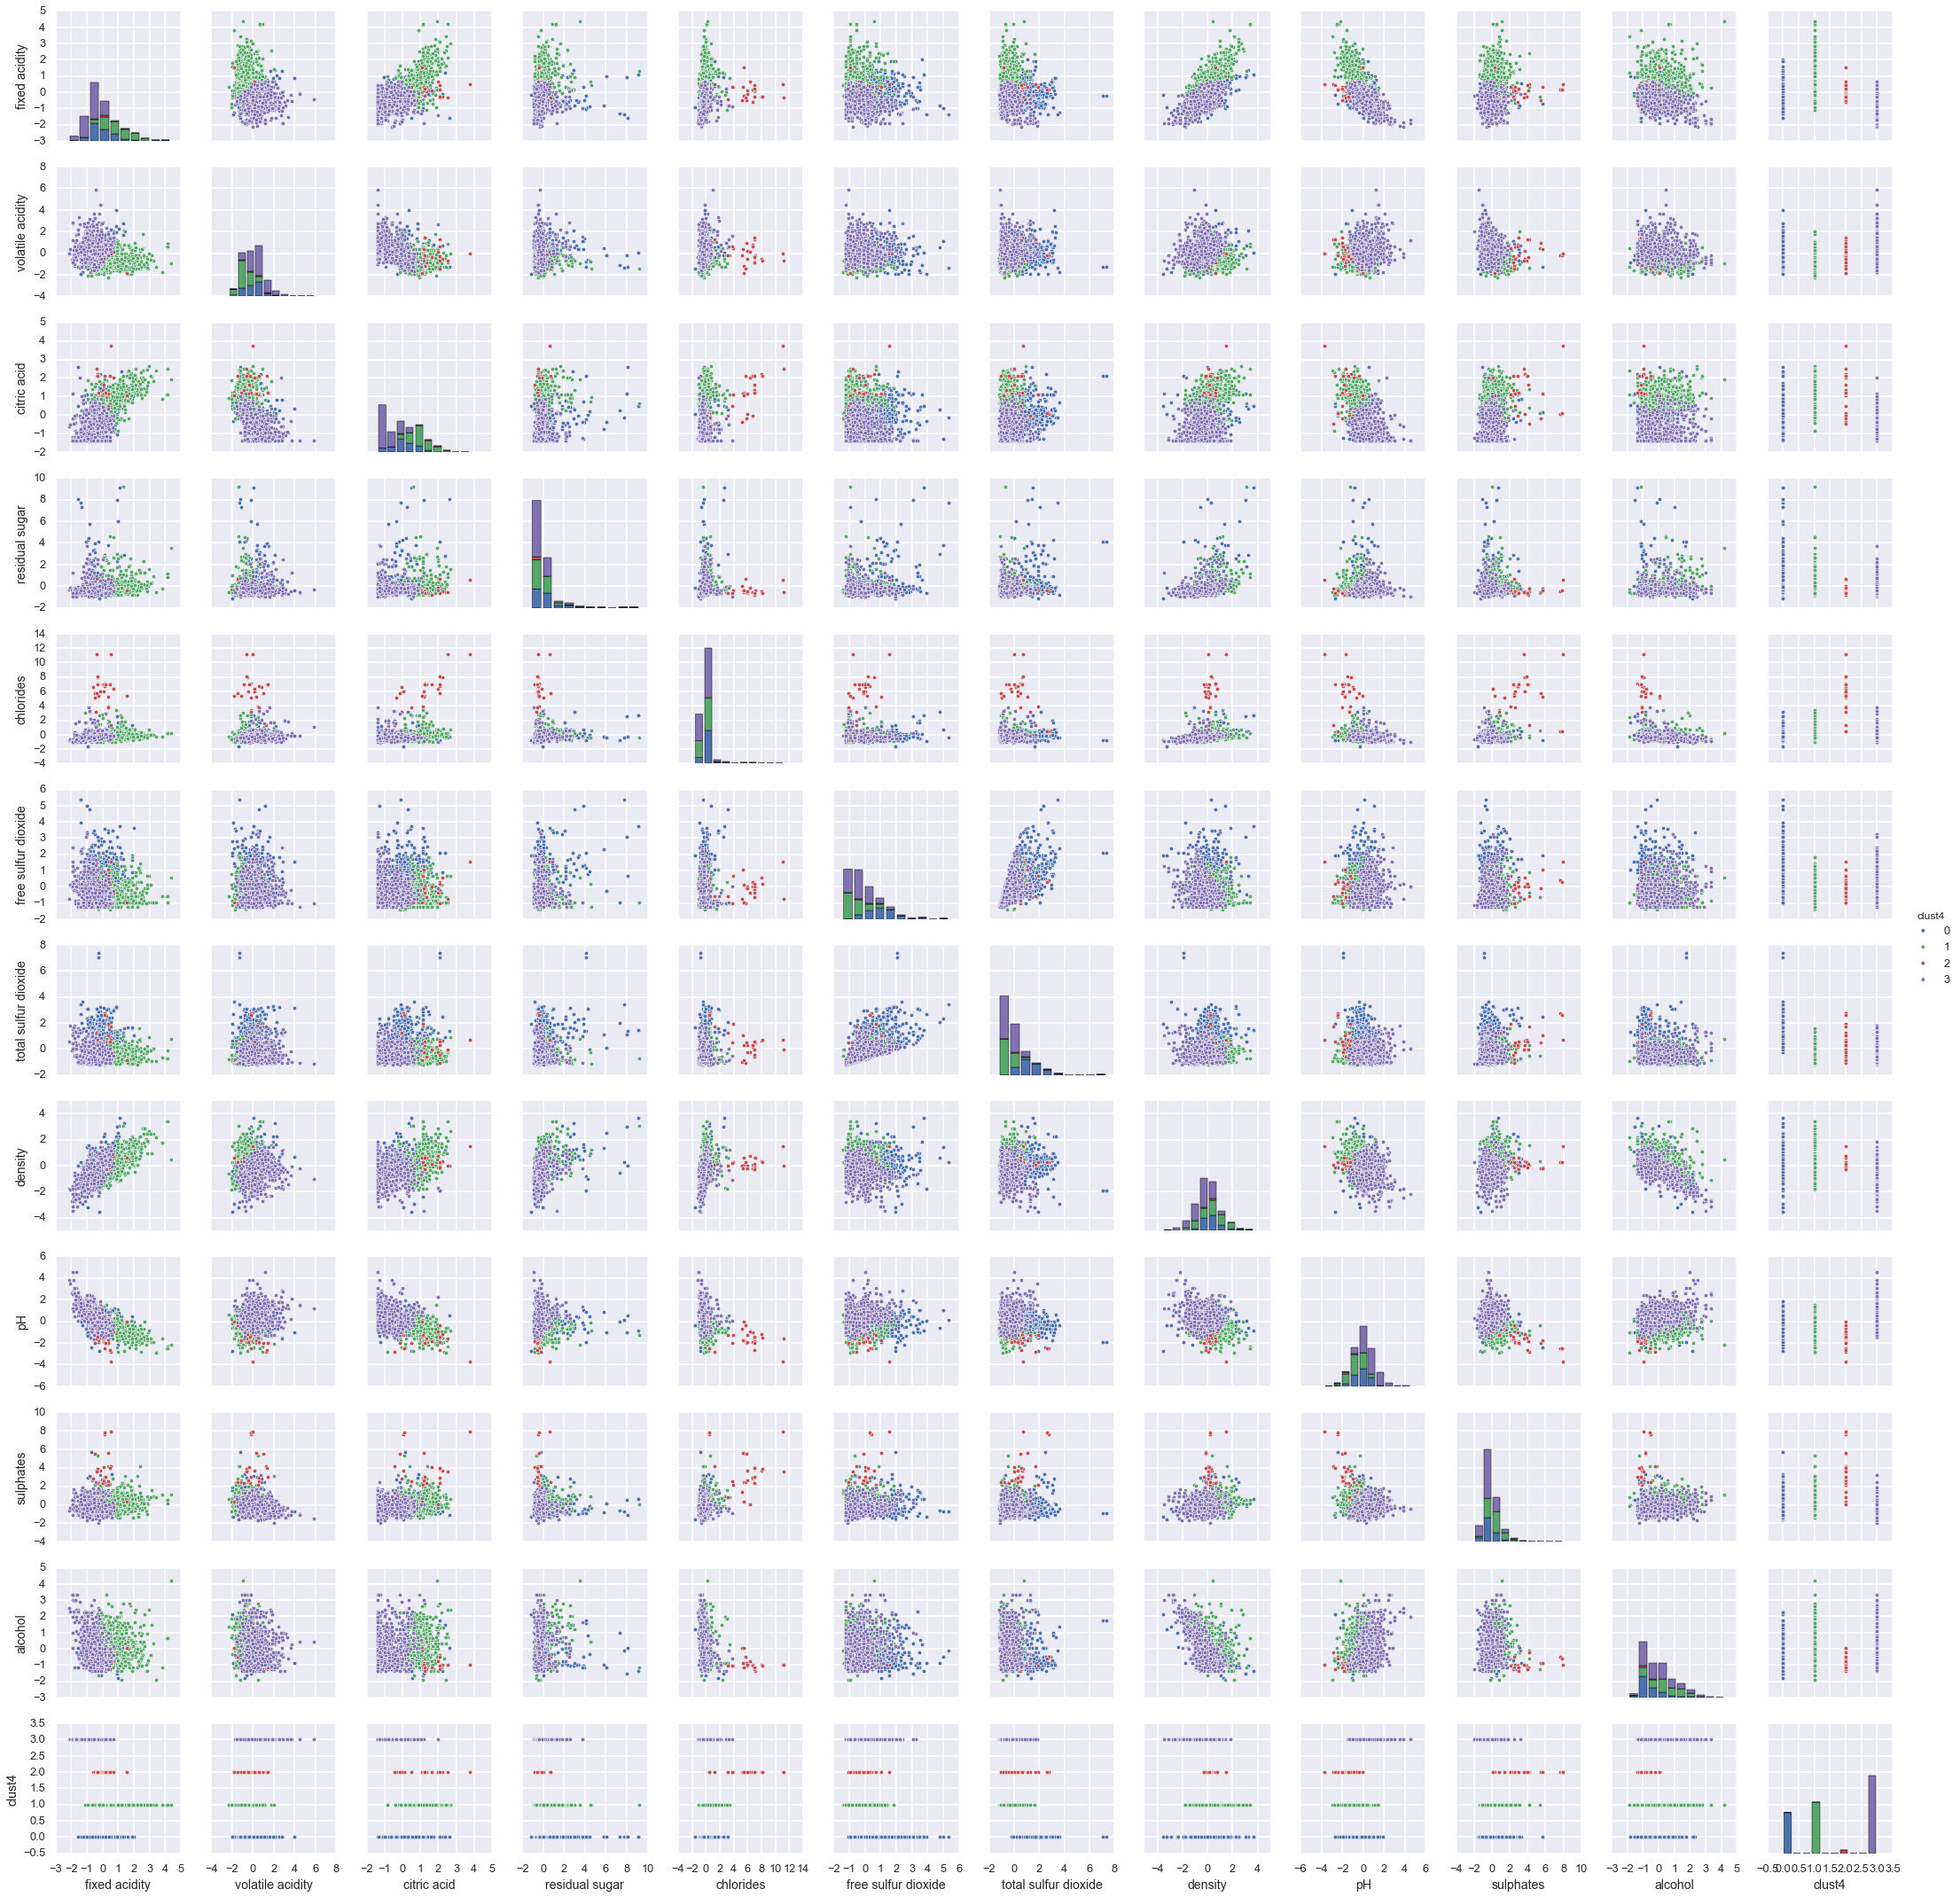

In [12]:
sns.pairplot(df_norm,hue='clust4')

### Такое ощущение, что kmeans действительно поймал какую-то структуру. Можно еще попробовать dbscan.

In [13]:
try:
    df_norm.drop('clust4',axis=1,inplace=True)
except:
    pass

In [14]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2,min_samples=50).fit(df_norm)

In [15]:
distortions = []
nclusters = []
for i in np.arange(0.1,7,0.1):
    db = DBSCAN(eps=i).fit(df_norm)
    db.fit(df_norm)
    cluster_labels = db.labels_
    try:
        sil = silhouette_score(df_norm, cluster_labels)
    except:
        sil = np.nan
    distortions.append(sil)
    nclusters.append(len(set(cluster_labels)))

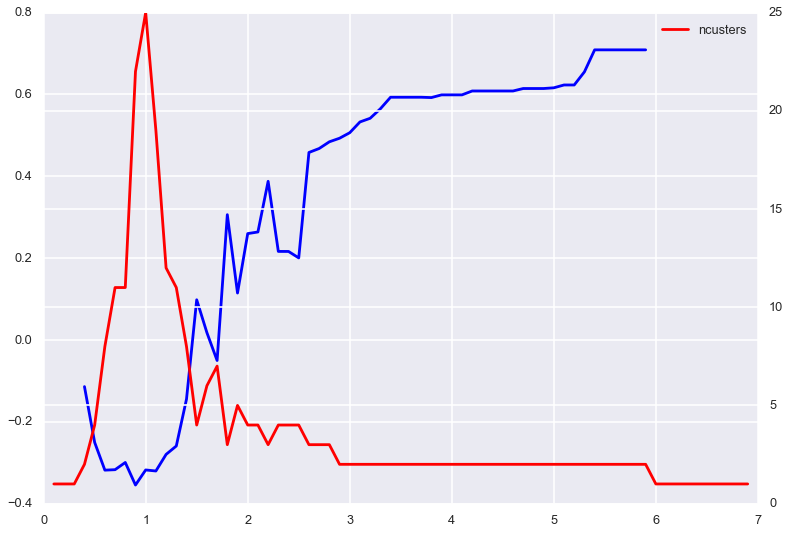

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(np.arange(0.1,7,0.1), distortions,c='b',label='sil')
ax2 = ax1.twinx()
ax2.plot(np.arange(0.1,7,0.1), nclusters,c='r',label='ncusters')
plt.legend(loc='upper right')
plt.show()

### На графике видна зависимость силуэта и кол-ва кластеров от параметра eta. Похоже, что целесообразно попробовать eta в районе 2, где получается разумное кол-во кластеров.

In [17]:
db_results = pd.DataFrame([distortions,nclusters,list(np.arange(0.1,7,0.1))]).T
db_results[(db_results[0] >= 0.2)&(db_results[1] > 3)]

0    1    2
19  0.259836  4.0  2.0
20  0.263769  4.0  2.1
22  0.216286  4.0  2.3
23  0.216198  4.0  2.4
24  0.200419  4.0  2.5

Возьмем лучший параметр, = 2.5

In [18]:
db = DBSCAN(eps=2.5).fit(df_norm)
db.fit(df_norm)
cluster_labels = db.labels_

In [19]:
print (np.sum((cluster_labels == -1)))
print (np.sum((cluster_labels == 0)))
print (np.sum((cluster_labels == 1)))
print (np.sum((cluster_labels == 2)))

55
1523
15
6


### Получился один очень большой класс, а другеие маленькие. Это не очень подходит. Возможно, нужно лучше настраивать параметры. Попробую еще meanshift.

In [20]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(df_norm)
len(ms.cluster_centers_)

10

In [21]:
silhouette_score(df_norm,ms.labels_)

0.32831862787516697

In [22]:
df_norm['mean_shift'] = ms.labels_

In [23]:
df_norm.groupby('mean_shift')['mean_shift'].count()

mean_shift
0    1530
1      23
2       9
3       4
4       2
5       9
6      14
7       4
8       3
9       1
Name: mean_shift, dtype: int64

### Силуэт получился внушительный и большое кол-во классов. Но снова имеем одим большой класс, а остальные совсем не значительные. Возможно нужно искать другие параметры, но в рамках задания на это нету времени. Поэтому в качестве кластрезации я буду использовать kmeans. Возможно потом так же попробовать какую-нибудь агломеративную кластеризацию.

### Перейдем к созданию предсказательной модели.

# Модель

### Я возьму несколько алгоритмов со стандартными параметрами, и на кросс валидации проверю, какая из них лучше. Затем подберу параметры и создам новые переменные для лучшей модели, чтобы получить более высокое качество. Я буду считать, что это задача регрессии (можно рассматривать ее и как задачу классификации.

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]],
                                                       df[df.columns[-1]],
                                                          test_size=0.2, 
                                                          random_state=0)

models = []
models.append(LinearRegression())
models.append(RandomForestRegressor(random_state=0))
models.append(GradientBoostingRegressor(random_state=0))

In [223]:
cv = StratifiedKFold(y_train,n_folds=5,shuffle=True,random_state=0)
print 'model|','acc_train|'
for model in models:
    acc = -cross_val_score(model,X_train,y_train,cv=cv,scoring='mean_squared_error')
    print str(model)[:15], abs(acc.mean())

model| acc_train|
LinearRegressio 0.435370458319
RandomForestReg 0.377699795415
GradientBoostin 0.379778443246


### Лес и бустинг показывают примерно одинаковые результаты. Посмотрим, что будет на нормированных данных.

In [222]:
cv = StratifiedKFold(y_train,n_folds=5,shuffle=True,random_state=0)
print 'model|','log_train|','acc_train|'
for model in models:
    scaler = StandardScaler()
    pipeline = Pipeline([('scaler',scaler),('model',model)])
    acc = -cross_val_score(pipeline,X_train,y_train,cv=cv,scoring='mean_squared_error')
    print str(model)[:15], acc.mean()

model| log_train| acc_train|
LinearRegressio 0.435370458319
RandomForestReg 0.376172790787
GradientBoostin 0.379793128313


### Ничего особо не изменилось. Давайте настроим лес.

In [216]:
MSE = np.zeros((100))

In [224]:
trees = [10] + list(np.arange(50,1050,50))
MSE = np.zeros((len(trees)))
for i,n in enumerate(trees):
    clf = RandomForestRegressor(n_estimators=n)
    MSE[i] = -cross_val_score(clf,X_train,y_train,cv=cv,scoring='mean_squared_error',n_jobs=-1).mean()

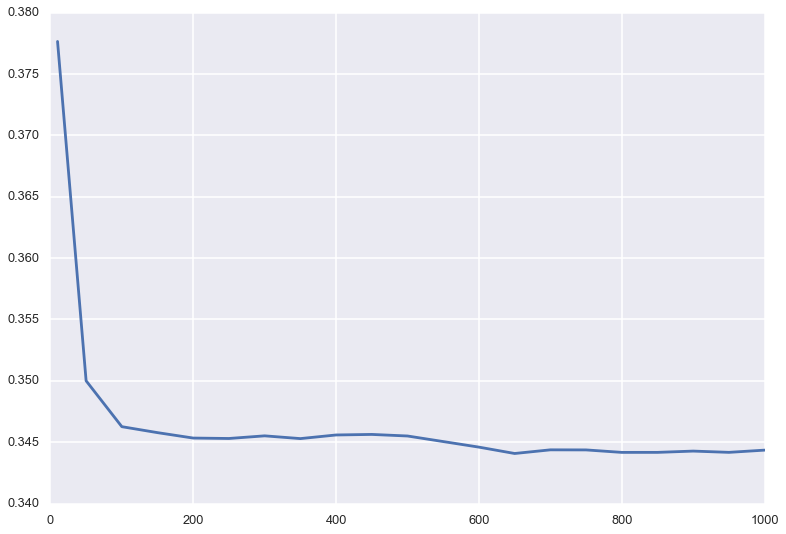

In [225]:
plt.plot(trees,MSE)

### Будем считать, что оптимальное кол-во деревьев - 200. Далее выполним поиск параметров по сетке и отберем лучшую модель.

In [235]:
from scipy.stats import randint as sp_randint
clf = RandomForestRegressor(n_estimators=200)

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,n_jobs=-1,cv=cv,scoring='mean_squared_error')



In [236]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[5 5 ..., 6 5], n_folds=5, shuffle=True, random_state=0),
          error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11b313050>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11b313150>, 'bootstrap': [True, False], 'max_depth': [3, None], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11b313110>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='mean_squa

In [244]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [237]:
random_search.best_score_

-0.34420793588741205

### Лучшие параметры найдены, и качество улучшилось: было 0.376, стало 0.344. Посмотрим, какие признаки лес счел важными.

In [242]:
pd.DataFrame(zip(X_train.columns,random_search.best_estimator_.feature_importances_)).sort_values(1,ascending=False)

0         1
10               alcohol  0.166818
9              sulphates  0.134706
1       volatile acidity  0.131168
7                density  0.090190
6   total sulfur dioxide  0.084015
4              chlorides  0.074739
2            citric acid  0.073232
0          fixed acidity  0.068899
8                     pH  0.061944
3         residual sugar  0.058249
5    free sulfur dioxide  0.056038

### Алкоголь - самый важный признак, как я и заметил еще на графиках! Проверим, что покажет модель, на данных, которые мы еще не видели.

In [286]:
from sklearn.metrics import mean_squared_error

In [243]:
best_forest = random_search.best_estimator_

In [285]:
best_forest.fit(X_train,y_train)
mean_squared_error(best_forest.predict(X_test),y_test)

0.32105335937500001

### Думаю, что это неплохой результ. Теперь попробую еще настроить регрессию. Я создам полиномиальные фичи и отберу их с помощью лассо.

In [301]:
clf = LinearRegression()

In [302]:
cross_val_score(clf,X_train,y_train,cv=cv,scoring='mean_squared_error').mean()

-0.43537045831944765

0.435 - base line.

In [293]:
from sklearn.preprocessing import PolynomialFeatures
second_order=PolynomialFeatures(degree=2, interaction_only=False)
df_second = second_order.fit_transform(X_train)
df_second_norm = scaler.fit_transform(df_second)

In [294]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, normalize=True, max_iter=2*10**5)

In [295]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import expon
np.random.seed(101)
stratified_cv_iterator = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=101)

search_func=RandomizedSearchCV(estimator=lasso, param_distributions={'alpha':np.logspace(-5,2,100)}, n_iter=10, 
                               scoring='mean_squared_error', n_jobs=-1, iid=False, refit=True, cv=stratified_cv_iterator)
search_func.fit(df_second_norm, y_train)
print ('Best alpha: %0.5f' % search_func.best_params_['alpha'])
print ('Best CV mean squared error: %0.3f' % np.abs(search_func.best_score_))

Best alpha: 0.00006
Best CV mean squared error: 0.416


Качество регрессии улучшилось.

In [153]:
from sklearn.linear_model import LinearRegression

In [296]:
print ('Zero value coefficients: %i out of %i' % (np.sum(~(search_func.best_estimator_.coef_==0.0)), 
                                                 len(search_func.best_estimator_.coef_)))

Zero value coefficients: 29 out of 78


### У нас осталось 29 фич из 78 оригинальных и новых. Теперь посмотрим, что получиться на данных, на которых мы не обучались.

In [297]:
best_regr = search_func.best_estimator_

In [299]:
second_order=PolynomialFeatures(degree=2, interaction_only=False)
df_second_test = second_order.fit_transform(X_test)
df_second_test = scaler.fit_transform(df_second_test)

In [300]:
best_regr.fit(df_second_norm,y_train)
mean_squared_error(best_regr.predict(df_second_test),y_test).mean()

0.38539223275262385

### Лес все равно гораздо лучше, но с помощью новых фич регрессия значительно улучшилась.

### Думаю, для тестового задания этого должно быть достаточно. Дальше можно более точно настраивать параметры, попробовать другие методы отбора переменыых, попробовать другие модели и еще много чего интересного!

### В задании было вопрос о гипотетическом сценарии использования модели. Можно использовать данную модель на аукционе, где продают дорогие вина. Перед тем как выставить лот, вино будет оценивать группой экспертов и моделью. Модель всегда будет объективна, и ее результат вместе с оценкой эксперов можно использовать для окончательного принятия решения.